<a href="https://colab.research.google.com/github/ioresss/AllMusicDataAnalysis/blob/main/AllMusicWebScrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U selenium
!apt-get update
!apt install chromium-chromedriver

     |████████████████████████████████| 958 kB 5.2 MB/s 
     |████████████████████████████████| 138 kB 47.9 MB/s 
     |████████████████████████████████| 356 kB 41.3 MB/s 
     |████████████████████████████████| 55 kB 3.4 MB/s 
     |████████████████████████████████| 3.6 MB 30.6 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.7 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidi

In [ ]:
from selenium import webdriver
from selenium.webdriver.support.select import Select
from bs4 import BeautifulSoup
import time
from selenium.webdriver.support.wait import WebDriverWait


options = webdriver.ChromeOptions()
options.add_argument('--headless') 
options.add_argument('--no-sandbox')


driver = webdriver.Chrome(options = options)

In [ ]:
url =  'https://www.allmusic.com/advanced-search'
driver.get(url)

In [ ]:
#Selecionando o ano inicial
select_element = driver.find_element_by_class_name('start-year')
select_object = Select(select_element)
select_object.select_by_value("2021")

#Selecionando o ano final
select_element = driver.find_element_by_class_name('end-year')
select_object = Select(select_element)
select_object.select_by_value("2021")


check1 = driver.find_element_by_id('editorialrating:9')
check1.click()

check2 = driver.find_element_by_id('editorialrating:8')
check2.click()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  from ipykernel import kernelapp as app


In [ ]:
links = []

while(True):
    try:
      #pegar os albuns
      bs = BeautifulSoup( driver.find_element_by_xpath('//*[@id="cmn_wrap"]/div[2]/div[2]/section[2]/div[1]/table').get_attribute('innerHTML'),'html.parser')
      for link in bs.findChildren(['tr'])[1:]:
        links.append(link.find_all("td", {"class": "title"})[0].a['href'])
      
      driver.find_element_by_class_name("next")
      driver.execute_script("document.getElementsByClassName(\"next\")[0].getElementsByTagName(\"a\")[0].click()")
      time.sleep(3)
    except:
      break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
links

['https://www.allmusic.com/album/neil-young-archives-vol-2-1972-1976-mw0003475450',
 'https://www.allmusic.com/album/release-me-vol-2-mw0003539186',
 'https://www.allmusic.com/album/reprise-mw0003502197',
 'https://www.allmusic.com/album/screen-violence-mw0003537654',
 'https://www.allmusic.com/album/if-i-cant-have-love-i-want-power-mw0003554968',
 'https://www.allmusic.com/album/the-highlights-mw0003475449',
 'https://www.allmusic.com/album/van-weezer-mw0003357271',
 'https://www.allmusic.com/album/trio-tapestry-garden-of-expression-mw0003462433',
 'https://www.allmusic.com/album/ok-human-mw0003471882',
 'https://www.allmusic.com/album/other-worlds-mw0003492801',
 'https://www.allmusic.com/album/no-gods-no-masters-mw0003503478',
 'https://www.allmusic.com/album/the-lunar-injection-kool-aid-eclipse-conspiracy-mw0003444763',
 'https://www.allmusic.com/album/as-the-love-continues-mw0003448884',
 'https://www.allmusic.com/album/happier-than-ever-mw0003516209',
 'https://www.allmusic.com/a

In [10]:
albums = []


for link in links:
  driver.get(link)
  time.sleep(3)
  
  try:
    styles = []
    styleSize = len((driver.find_element_by_class_name('styles')).find_elements_by_tag_name('a'))

    for i in range(0, styleSize): 
      styles.append((driver.find_element_by_class_name('styles')).find_elements_by_tag_name('a')[i].text)
  except:
    styles = ''
  
  try:
    moods = []
    moodSize = len((driver.find_element_by_class_name('moods')).find_elements_by_tag_name('a'))

    for i in range(0,moodSize):
      moods.append((driver.find_element_by_class_name('moods')).find_elements_by_tag_name('a')[i].text)
  except:
    moods = ''

  try:
    themes = []
    themeSize = len((driver.find_element_by_class_name('themes')).find_elements_by_tag_name('a'))

    for i in range(0,themeSize):
      themes.append((driver.find_element_by_class_name('themes')).find_elements_by_tag_name('a')[i].text)
  except:
    themes = ''
  
  try:
    duration = driver.find_element_by_class_name('duration').text
  except:
    duration = ''
  try:
    release = driver.find_element_by_class_name('release-date').text
  except:
    release = ''
  try:
    genres = []
    genreSize = len((driver.find_element_by_class_name('genre')).find_elements_by_tag_name('a'))

    for i in range(0,themeSize):
      genres.append((driver.find_element_by_class_name('genre')).find_elements_by_tag_name('a')[i].text)
  except:
    genres = ''
  
  albums.append(
    {'Titulo' : driver.find_element_by_class_name('album-title').text,
     'Artista': driver.find_element_by_class_name('album-artist').text,
     'Lançamento': release.replace("Release Date ", ""),
     'Duracao': duration.replace("Duration\n", ""),
     'Genero' : genres,
     'Estilos musicais' : styles,
     'Humores' : moods, 
     'Temas' : themes
     }
  )
  




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/selenium/webdriver/remote/webelement.py:359: UserWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  warnings.warn("find_elements_by_* commands are deprecated. Please use find_elements() instead")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
/usr/l

In [ ]:
albums

[{'Artista': 'Neil Young',
  'Duracao': '08:44:47',
  'Estilos musicais': ['Album Rock',
   'Contemporary Pop/Rock',
   'Country-Rock',
   'Hard Rock',
   'Singer/Songwriter'],
  'Genero': '',
  'Humores': ['Pastoral',
   'Rustic',
   'Autumnal',
   'Bittersweet',
   'Confrontational',
   'Earthy',
   'Literate',
   'Reflective',
   'Searching',
   'Wistful',
   'Gentle',
   'Intimate',
   'Laid-Back/Mellow',
   'Organic',
   'Plaintive',
   'Poignant'],
  'Lançamento': 'March 5, 2021',
  'Temas': ['Healing/Comfort',
   'Comfort',
   'Loneliness',
   'Open Road',
   'Other Times & Places',
   'Heartache',
   'Lifecycle',
   'Road Trip',
   'TGIF',
   'Cool & Cocky',
   'Hanging Out',
   'Imagination',
   'Nighttime',
   'Politics/Society',
   'Pop/Rock'],
  'Titulo': 'Neil Young Archives, Vol. 2 (1972-1976)'},
 {'Artista': 'Barbra Streisand',
  'Duracao': '33:46',
  'Estilos musicais': ['Adult Contemporary',
   'Show Tunes',
   'Standards',
   'Vocal Pop',
   'Cast Recordings',
   'Mus

In [11]:
import json

In [12]:
with open('data.json', 'w') as outfile:
    json.dump(albums, outfile, indent= 4)

In [13]:
from google.colab import files 

In [14]:
files.download('data.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
#importando os packages necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [16]:
df = pd.read_json('data.json')

In [17]:
df

,Titulo,Artista,Lançamento,Duracao,Genero,Estilos musicais,Humores,Temas
0,Justice,Justin Bieber,"March 19, 2021",45:25,,"[Pop, Dance-Pop]","[Devotional, Dreamy, Precious, Vulnerable, Con...","[In Love, Relationships, Heartache, Reflection..."
1,Dancing With the Devil...The Art of Starting Over,Demi Lovato,"April 2, 2021",57:11,,"[Pop, Dance-Pop, Club/Dance, Contemporary R&B]","[Bright, Celebratory, Cheerful, Dramatic, Fun,...","[Introspection, Late Night, Partying, Feeling ..."
2,Aretha [2021],Aretha Franklin,"July 30, 2021",05:10:03,,"[Deep Soul, Soul, Southern Soul, Black Gospel]","[Confident, Gritty, Organic, Rousing, Earthy, ...","[Affirmation, Girls Night Out, Motivation, Rel..."
3,Revelación,Selena Gomez,"March 12, 2021",19:33,,"[Latin Pop, Pop, Reggaeton]","[Sensual, Sophisticated, Dramatic, Hypnotic, R...","[Partying, Relationships, In Love, Club, Roman..."
4,McCartney III Imagined,Paul McCartney,"July 23, 2021",47:30,,"[Contemporary Pop/Rock, Album Rock]","[Amiable/Good-Natured, Cheerful, Earnest, Happ...","[Hanging Out, Imagination, Late Night, At the ..."
...,...,...,...,...,...,...,...,...
358,Busoni: The 6 Sonatinas,Victor Nicoara,"July 23, 2021",01:10:30,,[Keyboard],"[Bright, Dark, Dissonant, Driving, Flowing, Me...",
359,Overtones for the Omniverse,Mocky,"July 30, 2021",,,"[Chamber Pop, Lounge, Instrumental Pop, Altern...","[Atmospheric, Elegant, Agreeable, Autumnal, Bi...","[Imagination, Long Walk, Rainy Day, Affection/..."
360,The Journey Home: Live from The Kennedy Center,John Brancy / Peter Dugan,"May 28, 2021",01:21:25,,[Vocal Music],"[Confident, Majestic, Marching, Melodic, Regre...",
361,Van Eyck: Der Fluyten Lust-Hof,François Lazarevitch,"April 23, 2021",01:12:47,,[Chamber Music],"[Airy, Earthy, Flowing, Lyrical, Melodic, Rust...",


In [22]:
df.describe()

,Titulo,Artista,Lançamento,Duracao,Genero,Estilos musicais,Humores,Temas
count,363,363,363,363,363,363,363,363
unique,363,354,47,335,2,158,358,159
top,Beethoven: Missa Solemnis,Various Artists,"February 5, 2021",,,[Chamber Music],,
freq,1,5,22,21,341,58,4,192


In [18]:
from wordcloud import WordCloud, STOPWORDS

In [20]:
artistas = ' '.join(df['Artista'].dropna())

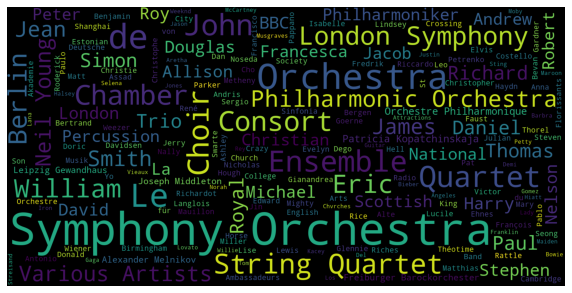

In [21]:
# gerar uma wordcloud dos artistas
wordcloudArtistas = WordCloud(background_color="black", width=1600, height=800).generate(artistas)


fig, ax = plt.subplots(figsize=(10,6))
ax.set_axis_off() 
plt.imshow(wordcloudArtistas); 


In [25]:
estilos = [item for sublist in df['Estilos musicais'].dropna() for item in sublist]

In [28]:
estilos = ' '.join(estilos)

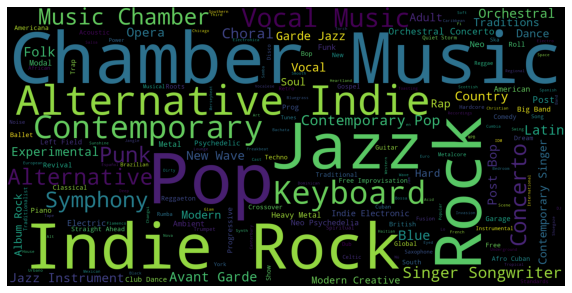

In [29]:
wordcloudEstilos = WordCloud(background_color="black", width=1600, height=800).generate(estilos)


fig, ax = plt.subplots(figsize=(10,6))
ax.set_axis_off() 
plt.imshow(wordcloudEstilos); 

In [30]:
humores = [item for sublist in df['Humores'].dropna() for item in sublist]

In [31]:
humores = ' '.join(humores)

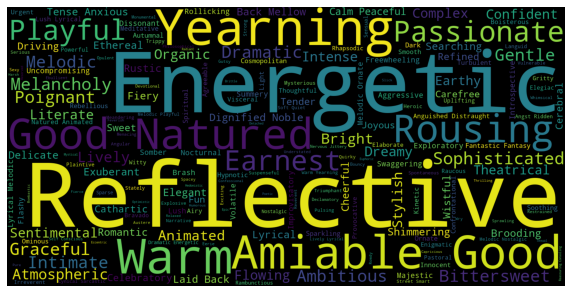

In [32]:
wordcloudHumores = WordCloud(background_color="black", width=1600, height=800).generate(humores)


fig, ax = plt.subplots(figsize=(10,6))
ax.set_axis_off() 
plt.imshow(wordcloudHumores); 

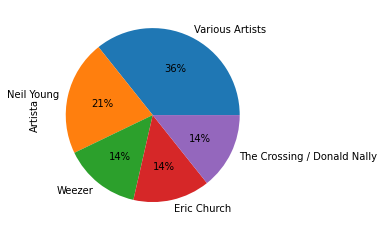

In [38]:
df['Artista'].value_counts().head().plot.pie(autopct='%.0f%%')

In [39]:
# importando biblioteca para manipulação de datas.
from datetime import datetime 

In [44]:
data_lançamento = [datetime.strptime(item, '%B %d, %Y') for item in df['Lançamento'] if len(item)>13] 

In [52]:
 meses=[item.month for item in data_lançamento]
 meses=pd.DataFrame(meses)

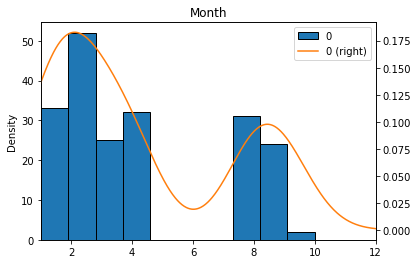

In [59]:
ax = meses.plot.hist(title='Month', edgecolor='black',  xlim=(1, 12))
meses.plot.kde(ax=ax, secondary_y=True, xlim=(1, 12))